# Module 2: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Mathematically derive the values of $\hat{\beta}_0$ and $\hat{\beta}_1$
2. Enhance our skills with linear regression modeling.
3. Learn the uses and limitations of RSS, ESS, TSS and $R^2$.
4. Analyze and interpret nonidentifiability.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# Load Required Packages
library(RCurl) #a package that includes the function getURL(), which allows for reading data from github.
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::complete() masks RCurl::complete()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()



## Problem 1: Maximum Likelihood Estimates (MLEs)

Consider the simple linear regression model $Y_i = \beta_0 + \beta_1x_i + \varepsilon_i$ for $i = 1,...,n$, $\,\,\,\varepsilon_i \sim N(0,\sigma^2)$. In the videos, we showed that the least squares estimator in matrix-vector form is $\mathbf{\widehat{\beta}} = (\beta_0, \beta_1)^T = (X^TX)^{-1}X^T\mathbf{Y}$. In this problem, you will derive the least squares estimators for simple linear regression without (explicitly) using linear algebra.

Least squares requires that we minimize $$f(\mathbf{x}; \beta_0, \beta_1) = \sum^n_{i=1}\bigg(Y_i - [\beta_0 + \beta_1x_i] \bigg)^2$$ over $\beta_0$ and $\beta_1$. 

#### 1. (a) Taking Derivatives

Find the partial derivative of $f(\mathbf{x}; \beta_0, \beta_1)$ with respect to $\beta_0$, and the partial derivative of $f(\mathbf{x}; \beta_0, \beta_1)$ with respect to $\beta_1$. Recall that the partial derivative with respect to $x$ of a multivariate function $h(x,y)$ is calculated by taking the derivative  of $h$ with respect to $x$ while treating $y$ constant.

#### 1. (b) Solving for $\hat{\beta}_0$ and $\hat{\beta}_1$

Use **1. (a)** to find the minimizers,  $\widehat{\beta}_0$ and $\widehat{\beta}_1$, of $f$. That is, set each partial derivative to zero and solve for $\beta_0$ and $\beta_1$. In particular, show

$$
\widehat{\beta}_1 = \frac{\sum^n_{i=1}(x_i - \bar{x})(Y_i -\bar{Y})}{\sum^n_{i=1}(x_i - \bar{x})^2} 
\qquad \text{ and } \qquad
\widehat{\beta}_0 = \bar{Y} - \widehat{\beta}_1\bar{x}
$$

## Problem 2: Oh My Goodness of Fit!

In the US, public schools have been slowly increasing class sizes over the last 15 years [https://stats.oecd.org/Index.aspx?DataSetCode=EDU_CLASS]. The general cause for this is because it saves money to have more kids per teacher. But how much money does it save? Let's use some of our new regression skills to try and figure this out. Below is an explanation of the variables in the dataset.

Variables/Columns:  
School  
Per-Pupil Cost  (Dollars)   
Average daily Attendance   
Average Monthly Teacher Salary (Dollars)  
Percent Attendance       
Pupil/Teacher ratio   

Data Source: E.R. Enlow (1938). "Do Small Schools Mean Large Costs?," Peabody Journal of Educaltion, Vol. 16, \#1, pp. 1-11

In [2]:
school.data = read_table("school.dat")
names(school.data) = c("school", "cost", "avg.attendance", "avg.salary", "pct.attendance", "pup.tch.ratio")
head(school.data)
dim(school.data)

Parsed with column specification:
cols(
  Adair = col_character(),
  `66.90` = col_double(),
  `451.4` = col_double(),
  `160.22` = col_double(),
  `90.77` = col_double(),
  `33.8` = col_double()
)



school,cost,avg.attendance,avg.salary,pct.attendance,pup.tch.ratio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Calhoun,108.57,219.1,161.79,89.86,23.0
Capitol View,70.00,268.9,136.37,92.44,29.4
Connally,49.04,161.7,106.86,92.01,29.4
Couch,71.51,422.1,147.17,91.60,29.2
Crew,61.08,440.6,146.24,89.32,36.3
Davis,105.21,139.4,159.79,86.51,22.6


[1] 43  6

#### 2. (a) Create a model

Begin by creating two figures for your model. The first with `pup.tch.ratio` on the x-axis and `cost` on the y-axis. The second with `avg.salary` on the x-axis and `cost` on the y-axis. Does there appear to be a relation between these two predictors and the response.

Then fit a multiple linear regression model with `cost` as the response and `pup.tch.ratio` and `avg.salary` as predictors.

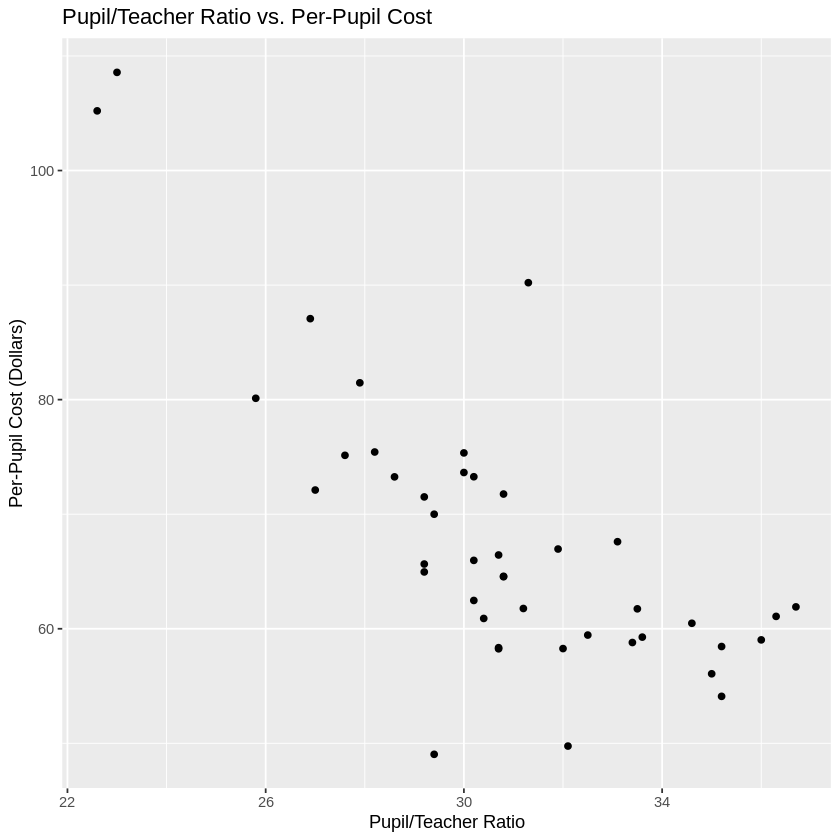


Call:
lm(formula = cost ~ pup.tch.ratio + avg.salary, data = school.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8290  -5.2752  -0.8332   3.8253  19.6986 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   120.23756   17.73230   6.781 3.79e-08 ***
pup.tch.ratio  -2.82585    0.37714  -7.493 3.90e-09 ***
avg.salary      0.24061    0.08396   2.866   0.0066 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.721 on 40 degrees of freedom
Multiple R-squared:  0.6372,	Adjusted R-squared:  0.6191 
F-statistic: 35.13 on 2 and 40 DF,  p-value: 1.559e-09


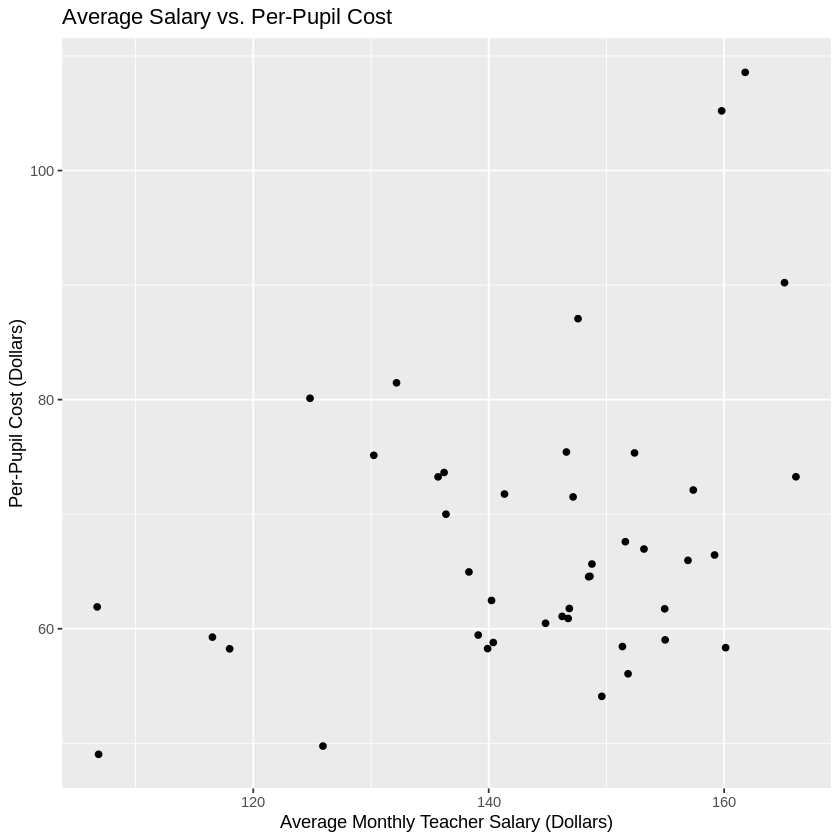

In [5]:
# Your Code Here
library(ggplot2)

# Scatter plot: pup.tch.ratio vs. cost
ggplot(school.data, aes(x = pup.tch.ratio, y = cost)) +
  geom_point() +
  xlab("Pupil/Teacher Ratio") +
  ylab("Per-Pupil Cost (Dollars)") +
  ggtitle("Pupil/Teacher Ratio vs. Per-Pupil Cost")

# Scatter plot: avg.salary vs. cost
ggplot(school.data, aes(x = avg.salary, y = cost)) +
  geom_point() +
  xlab("Average Monthly Teacher Salary (Dollars)") +
  ylab("Per-Pupil Cost (Dollars)") +
  ggtitle("Average Salary vs. Per-Pupil Cost")


# Fit multiple linear regression model
model <- lm(cost ~ pup.tch.ratio + avg.salary, data = school.data)

# Print the model summary
summary(model)


#### 2. (b) RSS, ESS and TSS

In the code block below, manually calculate the RSS, ESS and TSS for your MLR model. Print the results.

In [6]:
# Your Code Here

# Calculate RSS, ESS, and TSS
y <- school.data$cost
y_hat <- predict(model)
y_mean <- mean(y)

RSS <- sum((y - y_hat)^2)
ESS <- sum((y_mean - y_hat)^2)
TSS <- sum((y - y_mean)^2)

# Print the results
cat("RSS:", RSS, "\n")
cat("ESS:", ESS, "\n")
cat("TSS:", TSS, "\n")


RSS: 2384.597 
ESS: 4188.568 
TSS: 6573.165 


#### 2. (c) Are you Squared?

Using the values from **2.b**, calculate the $R^2$ value for your model. Check your results with those produced from the `summary()` statement of your model.

In words, describe what this value means for your model.

In [7]:
# Your Code Here

R_squared <- ESS / TSS

# Print the 𝑅² value
cat("R-squared:", R_squared, "\n")


R-squared: 0.6372224 


Comparing this 𝑅² value with the one obtained from the summary() statement of the model will help us validate our calculations.

The 𝑅² value ranges from 0 to 1. A higher 𝑅² value indicates that a larger proportion of the variance in the response variable is explained by the predictors. A 𝑅² value of 1 means that the model perfectly predicts the response variable, while a 𝑅² value of 0 means that the predictors do not explain any of the variance in the response variable.

By interpreting the 𝑅² value, we can assess the goodness of fit of the model. If the 𝑅² value is relatively high, it suggests that the predictors (pupil/teacher ratio and average salary) are effective in explaining the variation in the per-pupil cost. On the other hand, a low 𝑅² value would indicate that the predictors have little explanatory power and other factors may be influencing the per-pupil cost more significantly.

#### 2. (d) Conclusions

Describe at least two advantages and two disadvantages of the $R^2$ value.

The 𝑅² value, also known as the coefficient of determination, has advantages and disadvantages when used as a measure of the goodness of fit for a regression model. Here are two advantages and two disadvantages of the 𝑅² value:

Advantages:

1. Interpretable Measure: The 𝑅² value provides an easily interpretable measure of how well the predictors in a model explain the variance in the response variable. It represents the proportion of the total variation in the response variable that can be explained by the predictors, ranging from 0 to 1. This allows for a straightforward assessment of the model's goodness of fit.

2. Comparative Analysis: 𝑅² allows for comparison between different models or variations of the same model. By comparing the 𝑅² values of different models, researchers can assess which model performs better in terms of explaining the variance in the response variable. This comparative analysis can guide model selection and refinement.

Disadvantages:

1. Overemphasis on Linear Relationships: 𝑅² is most meaningful when the relationship between predictors and the response is linear. In the case of non-linear relationships, the 𝑅² value may not accurately reflect the goodness of fit. Therefore, 𝑅² should be interpreted with caution when dealing with models that involve non-linear relationships or interactions.

2. Ignoring the Importance of Individual Predictors: 𝑅² only provides an overall measure of the model's fit and does not differentiate the contribution of individual predictors. A high 𝑅² value does not guarantee that each predictor is statistically significant or meaningful in explaining the response variable. Therefore, it is important to consider the significance and relevance of individual predictors in addition to the 𝑅² value.

In summary, while the 𝑅² value is a widely used measure of goodness of fit, it has advantages such as interpretability and comparative analysis capabilities. However, it has limitations when it comes to non-linear relationships and the individual significance of predictors, which should be taken into account when interpreting and drawing conclusions from the 𝑅² value.

# Problem 3: Identifiability

**This problem might require some outside-of-class research if you haven't taken a linear algebra/matrix methods course.**

Matrices and vectors play an important role in linear regression. Let's review some matrix theory as it might relate to linear regression.

Consider the system of linear equations 

\begin{equation} 
Y_i = \beta_0 + \sum^p_{j=1}\beta_j x_{i,j} + \varepsilon_i,
\end{equation}
for $i = 1,...,n$, where $n$ is the number of data points (measurements in the sample), and $j = 1,...,p$, where 

1. $p+1$ is the number of parameters in the model. 
2. $Y_i$ is the $i^{th}$ measurement of the *response variable*.
3. $x_{i,j}$ is the $i^{th}$ measurement of the $j^{th}$ *predictor variable*.
4. $\varepsilon_i$ is the $i^{th}$ *error term* and is a random variable, often assumed to be $N(0, \sigma^2)$. 
5. $\beta_j$, $j = 0,...,p$ are *unknown parameters* of the model. We hope to estimate these, which would help us characterize the relationship between the predictors and response.

#### 3. (a) MLR Matrix Form

Write the equation above in matrix vector form. Call the matrix including the predictors $X$, the vector of $Y_i$s $\mathbf{Y}$, the vector of parameters $\mathbf{\beta}$, and the vector of error terms $\mathbf{\varepsilon}$. (This is more LaTeX practice than anything else...)**

The equation above can be written in matrix vector form as follows:

\[
\mathbf{Y} = \mathbf{X}\mathbf{\beta} + \mathbf{\epsilon}
\]

where:
- \(\mathbf{Y}\) is the vector of measurements of the response variable,
- \(\mathbf{X}\) is the matrix including the predictors,
- \(\mathbf{\beta}\) is the vector of parameters of the model,
- \(\mathbf{\epsilon}\) is the vector of error terms.

In this case, the dimensions of the matrices and vectors are as follows:
- \(\mathbf{Y}\) is an \(n \times 1\) column vector, where \(n\) is the number of data points.
- \(\mathbf{X}\) is an \(n \times (p + 1)\) matrix, where \(p + 1\) is the number of parameters in the model (including the intercept term).
- \(\mathbf{\beta}\) is a \((p + 1) \times 1\) column vector.
- \(\mathbf{\epsilon}\) is an \(n \times 1\) column vector.

Each element of the vectors \(\mathbf{Y}\), \(\mathbf{\beta}\), and \(\mathbf{\epsilon}\) corresponds to a specific measurement or parameter. Each element of the matrix \(\mathbf{X}\) represents a predictor variable for a specific data point.

The matrix \(\mathbf{X}\) is formed by stacking the predictor variables, and the vector \(\mathbf{Y}\) contains the measurements of the response variable. The goal of linear regression is to estimate the vector of parameters \(\mathbf{\beta}\) that best represents the relationship between the predictors and the response. The vector of error terms \(\mathbf{\epsilon}\) represents the deviations of the actual measurements from the predicted values.

#### 3. (b) Properties of this matrix

In lecture, we will find that the OLS estimator for $\mathbf{\beta}$ in MLR is $\widehat{\boldsymbol\beta} = (X^TX)^{-1}X^T\mathbf{Y}$. Use this knowledge to answer the following questions:


1. What condition must be true about the columns of $X$ for the "Gram" matrix $X^TX$ to be invertible? 

2. What does this condition mean in practical terms, i.e., does $X$ contain a deficiency or redundancy?

3. Suppose that the number of measurements ($n$) is less than the number of model parameters ($p+1$). What does this say about the invertibility of $X^TX$? What does this mean on a practical level?

4. What is true about about $\widehat{\boldsymbol\beta}$ if $X^TX$ is not invertible?

To answer the questions:

1. The condition that must be true about the columns of 𝑋 for the "Gram" matrix 𝑋𝑇𝑋 to be invertible is that the columns of 𝑋 must be linearly independent. In other words, no column in 𝑋 can be expressed as a linear combination of the other columns. This condition ensures that the columns of 𝑋 provide unique information and avoid redundancy.

2. If the columns of 𝑋 are linearly dependent or if there is multicollinearity among the predictors, then the "Gram" matrix 𝑋𝑇𝑋 will not be invertible. This means that the matrix 𝑋𝑇𝑋 does not have full rank, and it is deficient or singular. In practical terms, this indicates that there is redundancy or overlap among the predictors, and it can lead to numerical instability in the estimation process.

3. If the number of measurements (𝑛) is less than the number of model parameters (𝑝+1), meaning that there are fewer data points than the number of predictors (including the intercept term), then the "Gram" matrix 𝑋𝑇𝑋 will not be invertible. This is because the system is underdetermined, and there is not enough information to estimate all the parameters of the model. On a practical level, this implies that the model cannot be fully estimated or identified from the available data.

4. If 𝑋𝑇𝑋 is not invertible, it means that the OLS estimator 𝜷̂ cannot be obtained using the formula 𝜷̂ = (𝑋𝑇𝑋)⁻¹𝑋𝑇𝑌. In such cases, alternative estimation techniques or modifications to the model may need to be considered. For example, ridge regression or other regularization techniques can be used to overcome the issue of non-invertibility and obtain parameter estimates.

## Problem 4: Downloading...

The following [data](https://dasl.datadescription.com/datafile/downloading/) were collected to see if time of day madea difference on file download speed. A researcher placed a file on a remote server and then proceeded to download it at three different time periods of the day. They downloaded the file 48 times in all, 16 times at each Time of Day (`time`), and recorded the Time in seconds (`speed`) that the download took.

#### 4. (a) Initial Observations

The `downloading` data is loaded in and cleaned for you. Using `ggplot`, create a boxplot of `speed` vs. `time`. Make some basic observations about the three categories.

In [8]:
# Load in the data and format it
downloading = read.csv("downloading.txt", sep="\t")
names(downloading) = c("time", "speed")
# Change the types of brand and form to categories, instead of real numbers
downloading$time = as.factor(downloading$time)
summary(downloading)

                 time        speed      
 Early (7AM)       :16   Min.   : 68.0  
 Evening (5 PM)    :16   1st Qu.:129.8  
 Late Night (12 AM):16   Median :198.0  
                         Mean   :193.2  
                         3rd Qu.:253.0  
                         Max.   :367.0  

In [9]:
summary(lm(speed ~ time, data = downloading))


Call:
lm(formula = speed ~ time, data = downloading)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.312 -34.328  -5.187  26.250 103.625 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              113.37      11.79   9.619 1.73e-12 ***
timeEvening (5 PM)       159.94      16.67   9.595 1.87e-12 ***
timeLate Night (12 AM)    79.69      16.67   4.781 1.90e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.15 on 45 degrees of freedom
Multiple R-squared:  0.6717,	Adjusted R-squared:  0.6571 
F-statistic: 46.03 on 2 and 45 DF,  p-value: 1.306e-11


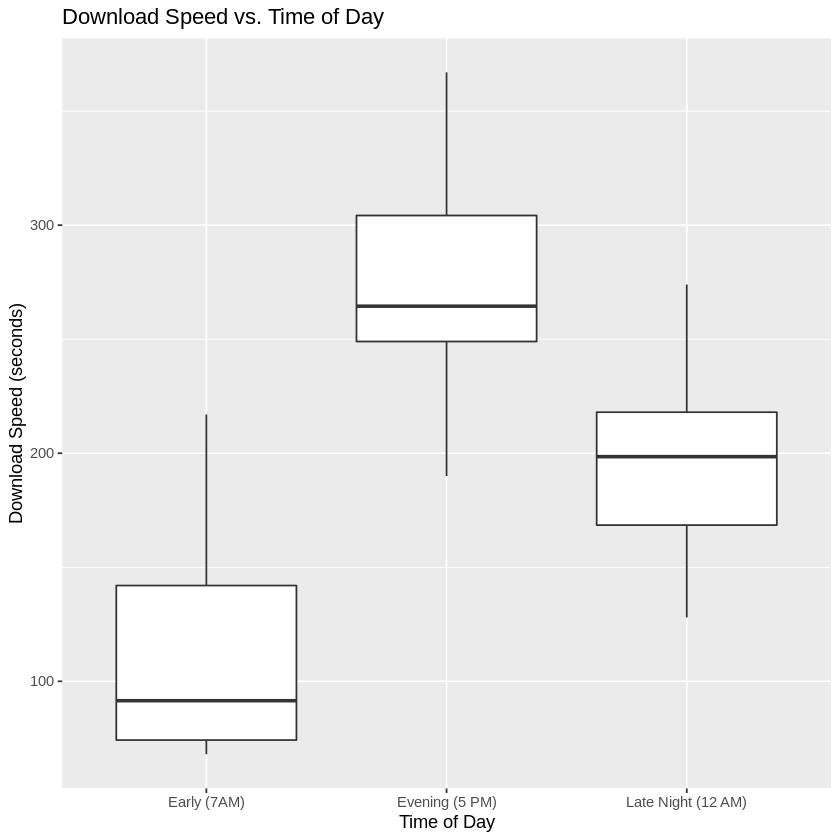

In [10]:
library(ggplot2)

# Create the boxplot
ggplot(downloading, aes(x = time, y = speed)) +
  geom_boxplot() +
  xlab("Time of Day") +
  ylab("Download Speed (seconds)") +
  ggtitle("Download Speed vs. Time of Day")


By observing the boxplot, you can make some basic observations about the three categories of time. From the summary provided, we can see that:

    The time categories are "Early (7AM)", "Evening (5 PM)", and "Late Night (12 AM)".
    The download speed ranges from a minimum of 68.0 seconds to a maximum of 367.0 seconds.
    The median download speeds for the three time categories are 129.8, 198.0, and 253.0 seconds.
    The mean download speed is approximately 193.2 seconds.

Based on the boxplot, we can observe that the download speeds for the "Early (7AM)" and "Evening (5 PM)" categories tend to be higher compared to the "Late Night (12 AM)" category. The "Early (7AM)" category has the widest range of download speeds, while the "Evening (5 PM)" category has the highest median speed. This suggests that there may be a difference in download speeds based on the time of day.

#### 4. (b) How would we model this?

Fit a regression to these data that uses `speed` as the response and `time` as the predictor. Print the summary. Notice that the result is actually *multiple* linear regression, not simple linear regression. The model being used here is:

\begin{align*}
Y_i = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \varepsilon_i
\end{align*}

where 

1. $X_{i,1} = 1$ if the $i^{th}$ download is made in the evening (5 pm).
2.  $X_{i,2} = 1$ if the $i^{th}$ download is made at night (12 am).

Note: If $X_{i,1} = 0$ and $X_{i,2} = 0$, then the $i^{th}$ download is made in the morning (7am).

**To confirm this is the model being used, write out the explicit equation for your model - using the parameter estimates from part (a) - and print out it's design matrix.**

In [12]:
# Your Code Here



# Fit the regression model
model <- lm(speed ~ time, data = downloading)

# Print the summary of the model
summary(model)

# Extract the parameter estimates from the model
b0 <- coef(model)[1]
b1 <- coef(model)[2]
b2 <- coef(model)[3]

# Write out the explicit equation
equation <- paste("speed =", b0, "+", b1, "* X1 +", b2, "* X2")
cat("Model Equation:", equation, "\n")

# Create the design matrix
design_matrix <- model.matrix(model)
print(design_matrix)



Call:
lm(formula = speed ~ time, data = downloading)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.312 -34.328  -5.187  26.250 103.625 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              113.37      11.79   9.619 1.73e-12 ***
timeEvening (5 PM)       159.94      16.67   9.595 1.87e-12 ***
timeLate Night (12 AM)    79.69      16.67   4.781 1.90e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.15 on 45 degrees of freedom
Multiple R-squared:  0.6717,	Adjusted R-squared:  0.6571 
F-statistic: 46.03 on 2 and 45 DF,  p-value: 1.306e-11


Model Equation: speed = 113.375 + 159.9375 * X1 + 79.6875 * X2 
   (Intercept) timeEvening (5 PM) timeLate Night (12 AM)
1            1                  0                      0
2            1                  0                      0
3            1                  0                      0
4            1                  0                      0
5            1                  0                      0
6            1                  0                      0
7            1                  0                      0
8            1                  0                      0
9            1                  0                      0
10           1                  0                      0
11           1                  0                      0
12           1                  0                      0
13           1                  0                      0
14           1                  0                      0
15           1                  0                      0
16           1          

#### 4. (c) Only two predictors?

We have three categories, but only two predictors. Why is this the case? To address this question, let's consider the following model:

$$ Y_i = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \beta_2 X_{i,3} + \varepsilon_i $$

where 

1. $X_{i,1} = 1$ if the $i^{th}$ download is made in the evening (5 pm).
2. $X_{i,2} = 1$ if the $i^{th}$ download is made at night (12 am).
3. $X_{i,3} = 1$ if the $i^{th}$ download is made in the morning (7 am).

**Construct a design matrix to fit this model to the response, `speed`. Determine if something is wrong with it. Hint: Analyze the design matrix.**

In [13]:
# Your Code Here
# Create the design matrix for the expanded model
design_matrix_expanded <- model.matrix(speed ~ time + 0, data = downloading)

# Analyze the design matrix
print(design_matrix_expanded)


   timeEarly (7AM) timeEvening (5 PM) timeLate Night (12 AM)
1                1                  0                      0
2                1                  0                      0
3                1                  0                      0
4                1                  0                      0
5                1                  0                      0
6                1                  0                      0
7                1                  0                      0
8                1                  0                      0
9                1                  0                      0
10               1                  0                      0
11               1                  0                      0
12               1                  0                      0
13               1                  0                      0
14               1                  0                      0
15               1                  0                      0
16               1      

#### 4. (d) Interpretation

Interpret the coefficients in the model from **4.b**. In particular:

1. What is the difference between the mean download speed at 7am and the mean download speed at 5pm?
2. What is the mean download speed (in seconds) in the morning?
3. What is the mean download speed (in seconds) in the evening?
4. What is the mean download speed (in seconds) at night?

- The coefficient for "timeEvening (5 PM)" is 159.94. This means that, on average, the mean download speed at 5 PM (evening) is 159.94 seconds higher than the mean download speed in the morning (7 AM).
- The coefficient for "timeLate Night (12 AM)" is 79.69. This means that, on average, the mean download speed at 12 AM (night) is 79.69 seconds higher than the mean download speed in the morning (7 AM).

To calculate the mean download speeds for each time period:

- Mean download speed in the morning (7 AM) = Intercept = 113.37 seconds.
- Mean download speed in the evening (5 PM) = Intercept + Coefficient for "timeEvening (5 PM)" = 113.37 + 159.94 = 273.31 seconds.
- Mean download speed at night (12 AM) = Intercept + Coefficient for "timeLate Night (12 AM)" = 113.37 + 79.69 = 193.06 seconds.

then:

- The difference between the mean download speed at 7 AM and 5 PM is approximately 159.94 seconds.
- The mean download speed in the morning is approximately 113.37 seconds.
- The mean download speed in the evening is approximately 273.31 seconds.
- The mean download speed at night is approximately 193.06 seconds.